In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
train = pd.read_csv(r"C:\Users\ashis\train.csv")
print('Shape of the train data:',train.shape)
print(train.head(10))

Shape of the train data: (913000, 4)
         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
5  2013-01-06      1     1     12
6  2013-01-07      1     1     10
7  2013-01-08      1     1      9
8  2013-01-09      1     1     12
9  2013-01-10      1     1      9


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [5]:
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


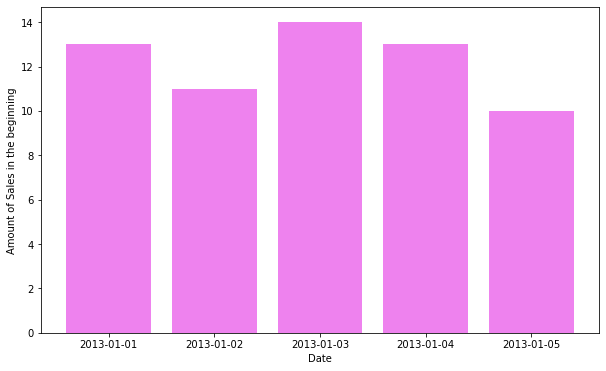

In [6]:
plt.figure(figsize=(10,6))
plt.bar(train.date[0:5], train.sales[0:5], data=train, color='violet')
plt.xlabel("Date")
plt.ylabel("Amount of Sales in the beginning")
plt.show()

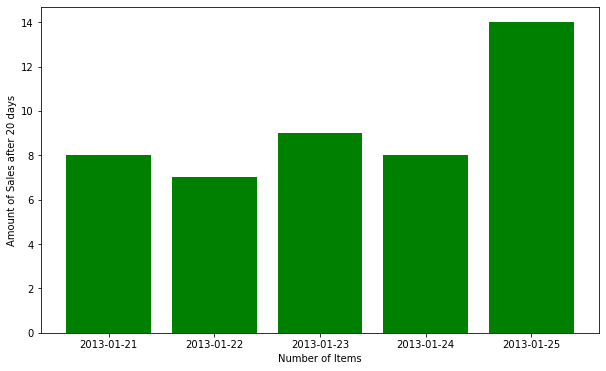

In [7]:
plt.figure(figsize=(10,6))
plt.bar(train.date[20:25], train.sales[20:25], data=train, color='green')
plt.xlabel("Number of Items")
plt.ylabel("Amount of Sales after 20 days")
plt.show()

<Figure size 2880x2160 with 0 Axes>

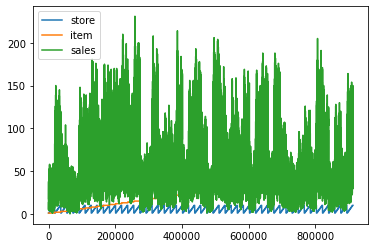

In [8]:
plt.figure(figsize=(40,30))
train.plot()
plt.show()

In [9]:
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [11]:
test = pd.read_csv(r"C:\Users\ashis\test.csv")
print('Columns of the train data',train.columns)
print('Columns of the test data', test.columns)

Columns of the train data Index(['date', 'store', 'item', 'sales'], dtype='object')
Columns of the test data Index(['id', 'date', 'store', 'item'], dtype='object')


In [12]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [15]:
sample_submission = pd.read_csv(r"C:\Users\ashis\sample_submission.csv")
print(sample_submission.head())

   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


In [16]:
import xgboost as xgb
# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 3 ,
          'silent': 1}

# Train xgboost model
xg_depth_20 = xgb.train(params=params, dtrain=dtrain)

ModuleNotFoundError: No module named 'xgboost'

In [17]:
import xgboost as xgb

from sklearn.metrics import mean_squared_error

#dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])


    # Make predictions
train_pred = xg_depth_20.predict(dtrain)     
test['sales'] =  xg_depth_20.predict(dtest)          
    
    # Calculate metrics
mse_train = mean_squared_error(train['sales'], train_pred)                  
mse_test = mean_squared_error(train.sales[0:45000], test['sales'])
print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
print(test['sales'])